In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np
from scipy.stats import norm
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.optimize import curve_fit
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt;
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
import itertools
from statsmodels.tsa.stattools import kpss
plt.rcdefaults()

In [6]:
df_uah1 = pd.read_excel("/Users/Marta/Desktop/diploma/Data_1_S.xlsx", "quantity")
df_uah1 = df_uah1.set_index(["Period"])
df_uah2 = df_uah1.iloc[:int(len(df_uah1)*0.85)]
df_uah1["Total"] = df_uah1["Total 1"] + df_uah1["Total 2"]

/var/folders/ln/cs0p4bn10ngb8pppk4p2ghx40000gn/T/ipykernel_22201/3746035440.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


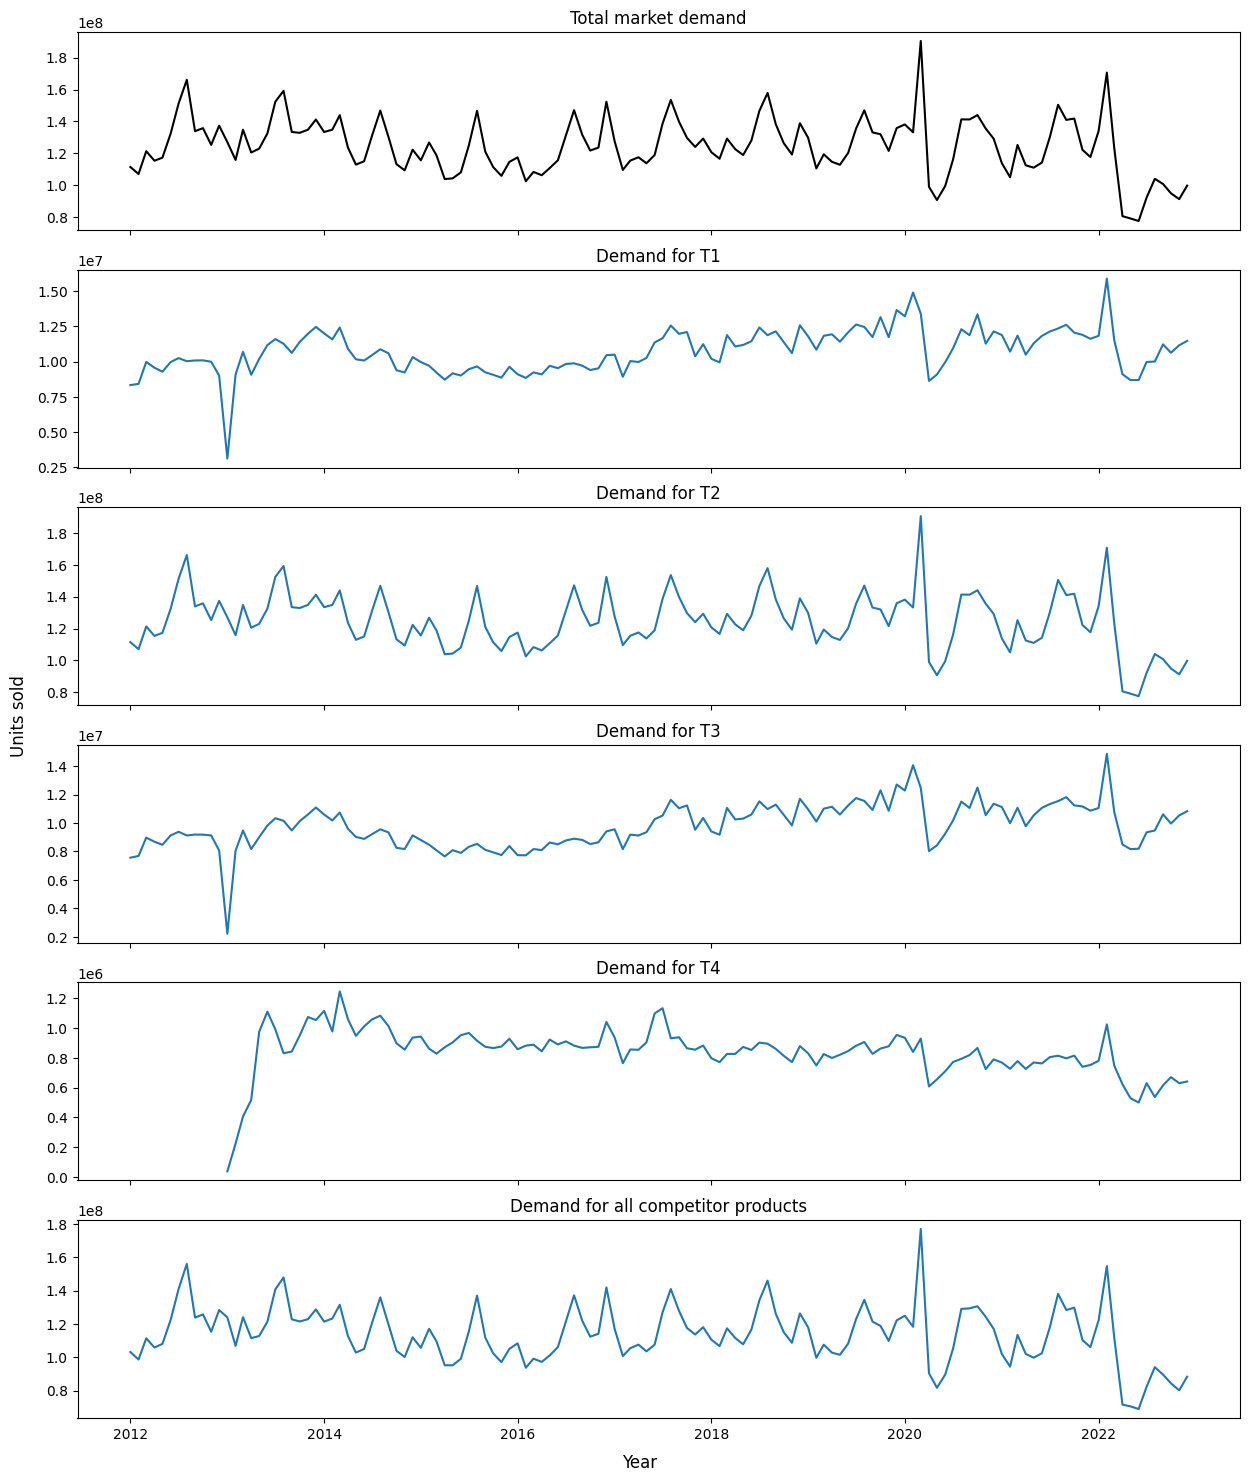

In [21]:
figure, axis = plt.subplots(6, 1, sharex=True, figsize=(15, 18))

axis[0].plot(df_uah1["Total 2"].index, df_uah1["Total 2"]+df_uah1["Total 1"], color="black")
axis[0].set_title("Total market demand")


axis[1].plot(df_uah1["T1"].index, df_uah1["T1"])
axis[1].set_title("Demand for T1")

  
axis[2].plot(df_uah1["T2"].index, df_uah1["T2"])
axis[2].set_title("Demand for T2")
# plt.ylabel("Units sold")

axis[3].plot(df_uah1["T3"].index, df_uah1["T3"])
axis[3].set_title("Demand for T3")
# plt.ylabel("Units sold")

axis[4].plot(df_uah1["T4"].index, df_uah1["T4"].replace(0, np.nan))
axis[4].set_title("Demand for T4")


axis[5].plot(df_uah1["Total 2"].index, df_uah1["Total 2"])
axis[5].set_title("Demand for all competitor products")

  
# figure.text(0, 0.5, 'common Y', va='center', rotation='vertical')
figure.supylabel('Units sold', x = 0.08)
figure.supxlabel('Year', y = 0.08)

figure.show()

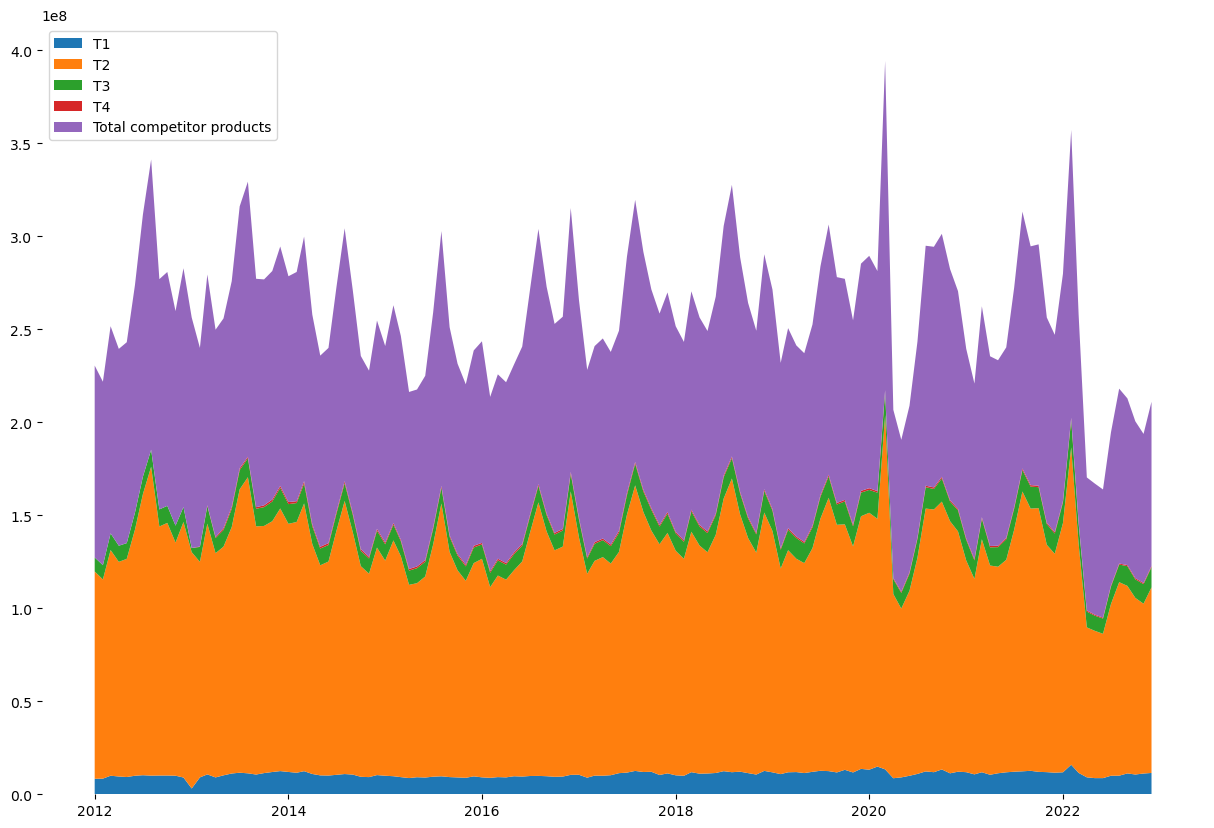

In [12]:
f,ax = plt.subplots(figsize=(15, 10))

# fig, ax = plt.subplots()
# ax.plot(range(10))
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# f.patch.set_visible(False)
# ax.axis('off')

plt.stackplot(df_uah1["Total 2"].index, 
              df_uah1["T1"],
              df_uah1["T2"],
              df_uah1["T3"],
              df_uah1["T4"], 
              df_uah1["Total 2"], 
              labels=["T1", "T2", "T3", "T4","Total competitor products"])

plt.legend(loc='upper left')
# plt.title("Stacked chart of demand for all products on the Market")

/var/folders/ln/cs0p4bn10ngb8pppk4p2ghx40000gn/T/ipykernel_22201/1331992048.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final["Total 3"] = df_uah1[["T1", "T2", "T3", "T4", "Total 2"]].sum(axis=1)
/var/folders/ln/cs0p4bn10ngb8pppk4p2ghx40000gn/T/ipykernel_22201/1331992048.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final[f"{i}_percentage"] = final[i]*100/final["Total 3"]
/var/folders/ln/cs0p4bn10ngb8pppk4p2ghx40000gn/T/ipykernel_22201/1331992048.py:7: SettingWithCopyWarning: 
A value is tryin

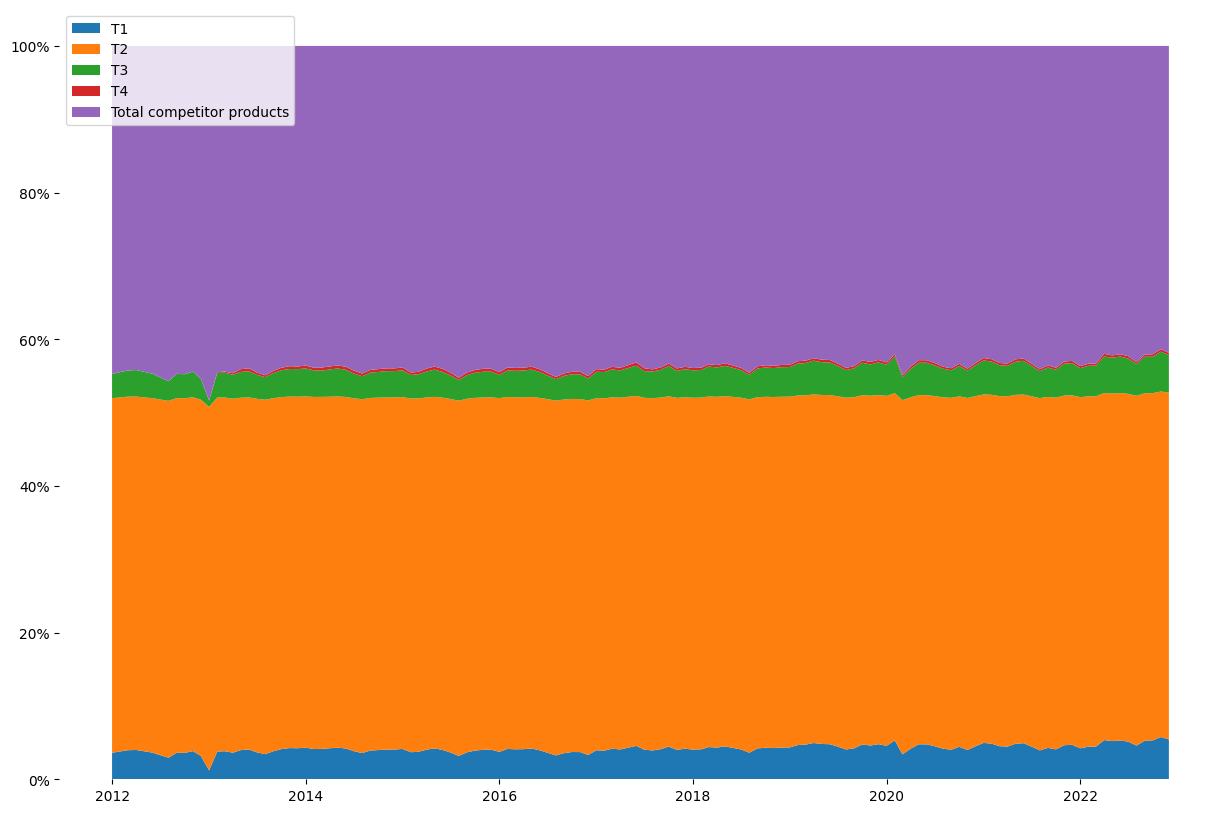

In [54]:
import matplotlib.ticker as mtick

final = df_uah1[["T1", "T2", "T3", "T4", "Total 2"]]
final["Total 3"] = df_uah1[["T1", "T2", "T3", "T4", "Total 2"]].sum(axis=1)
final
for i in ["T1", "T2", "T3", "T4", "Total 2"]:
    final[f"{i}_percentage"] = final[i]*100/final["Total 3"]

f,ax = plt.subplots(figsize=(15, 10))

# fig, ax = plt.subplots()
# ax.plot(range(10))
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# f.patch.set_visible(False)
# ax.axis('off')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.stackplot(final["Total 2"].index, 
              final["T1_percentage"],
              final["T2_percentage"],
              final["T3_percentage"],
              final["T4_percentage"], 
              final["Total 2_percentage"], 
              labels=["T1", "T2", "T3", "T4","Total competitor products"])

plt.legend(loc='upper left')

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

#define data
data = df_uah1.loc["2021-01-01":"2021-12-01", [c for c in df_uah1.columns if "Total" not in c]].sum().sort_values(ascending=False)
labels = data.index
labels_to_colors = pd.DataFrame()
labels_to_colors["label"] = labels
cs = sns.color_palette('pastel')[0:len(data)]*10
labels_to_colors["color"] = cs[0:len(data)]
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:len(data)]
print(len(colors))
#create pie chart
plt.pie(data, colors = colors, labels = list(labels[:12])+[""]*(len(labels)-12))
plt.title("Structure of market demand in 2021")
# plt.show()
plt.savefig("/Users/Marta/Desktop/diploma/visualisations/structure_2021.png")
plt.close()

10


In [103]:
data = df_uah1.loc["2022-01-01":"2022-12-01", [c for c in df_uah1.columns if "Total" not in c]].sum().sort_values(ascending=False)
data = pd.merge(pd.DataFrame(data), labels_to_colors, how="left", left_index=True, right_on="label")
labels = data.index

#define Seaborn color palette to use
#create pie chart
data.columns = ['value', 'label', 'color']
plt.pie(data["value"], colors = data["color"], labels = list(data["label"][:12])+[""]*(len(data["label"])-12))
plt.title("Structure of market demand in 2022")
# plt.show()
plt.savefig("/Users/Marta/Desktop/diploma/visualisations/structure_2022.png")
plt.close()

<AxesSubplot:title={'center':"Correlation between competitor \n products' demand"}>

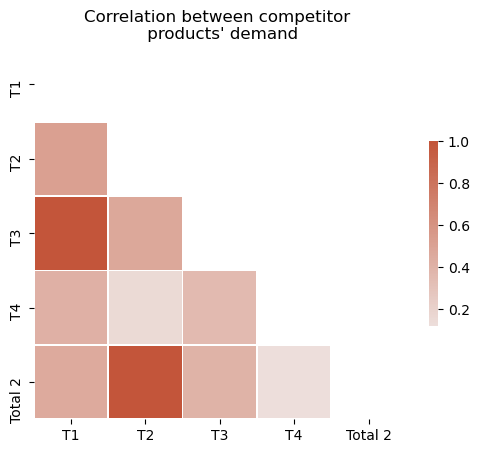

In [60]:
corr = df_uah1[["T1","T2","T3","T4","Total 2"]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(6, 6))
plt.title("Correlation between competitor \n products' demand")
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .4})

In [48]:
# see if the series is stationary with a derministic trend?
# critical values {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
def check_kpss(ts):
    dftest = kpss(ts, regression="ct")
#     dftest = kpss(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[3]['10%']
    print(dftest)

    if (pvalue < 0.1) and (adf < critical_value):
        print(pvalue, adf)
        print('The series is not stationary')
        
    else:
        print('The series is stationary')
    print("\n")
check_kpss(df_uah1["T1"])
check_kpss(df_uah1["T2"]) # stationary around level trend
check_kpss(df_uah1["T3"])
check_kpss(df_uah1["T4"].replace(0, np.nan).dropna())
check_kpss(df_uah1["Total 2"].replace(0, np.nan).dropna())

(0.11348803312790347, 0.1, 5, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})
The series is stationary


(0.11577074043434045, 0.1, 4, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})
The series is stationary


(0.13114697727249938, 0.07750559764351965, 5, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})
The series is stationary


(0.1453182030461844, 0.05126258695151036, 5, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})
The series is stationary


(0.11265248059540568, 0.1, 4, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})
The series is stationary




/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [46]:
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    print(dftest)
    if (pvalue < 0.1) and (adf < critical_value):
        print('The series is stationary')
        print(round(dftest[1], 3))
    else:
        print('The series is NOT stationary')
        print(round(dftest[1], 3))
    print("\n")

check_stationarity(df_uah1["T1"])
check_stationarity(df_uah1["T2"]) # not stationary
check_stationarity(df_uah1["T3"])
check_stationarity(df_uah1["T4"].replace(0, np.nan).dropna())

check_stationarity(df_uah1["Total 2"])
print("\n\n\n")

check_stationarity(df_uah1["T2"].diff().dropna())
check_stationarity(df_uah1["Total 2"].diff().dropna())

(-5.42137356524822, 3.0541114216987877e-06, 0, 131, {'1%': -3.481281802271349, '5%': -2.883867891664528, '10%': -2.5786771965503177}, 3602.297681686221)
The series is stationary
0.0


(-1.4981799878099187, 0.5344114800195382, 12, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, 4228.68457645607)
The series is NOT stationary
0.534


(-5.0269353164871555, 1.962433857367781e-05, 0, 131, {'1%': -3.481281802271349, '5%': -2.883867891664528, '10%': -2.5786771965503177}, 3590.723399362152)
The series is stationary
0.0


(-5.275057222900298, 6.166104542255525e-06, 1, 118, {'1%': -3.4870216863700767, '5%': -2.8863625166643136, '10%': -2.580009026141913}, 2701.996436998148)
The series is stationary
0.0


(-1.313647579025879, 0.6229056308699162, 12, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, 4218.21576883413)
The series is NOT stationary
0.623






(-4.889240648520739, 3.6595700414715435e-05, 11, 119, {'1%': -3.4

In [ ]:
model_seasonal = SARIMAX(ts_train, order=(p,d,q), seasonal_order=(P,D,Q,12))
model_fit_seasonal = model_seasonal.fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Period'>

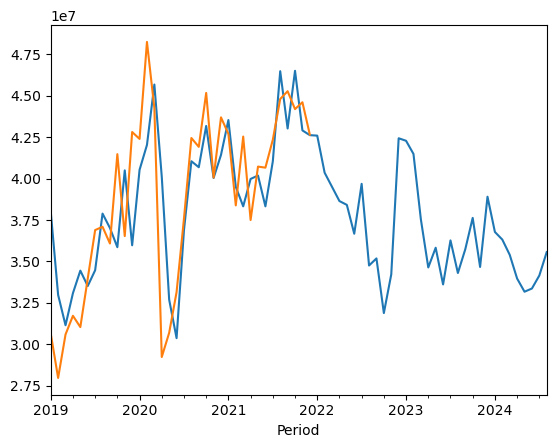

In [81]:
m = SARIMAX(df_uah2["T1"], order=(12,0,3), seasonal_order=(12,0,3,16), type="additive", trend=(1,0,0)).fit()
preds = m.predict(start = 0, end= 67, dynamic=False)
preds.plot()
df_uah2["T1"].plot()
df_uah1["T1"].plot()

<AxesSubplot:xlabel='Period'>

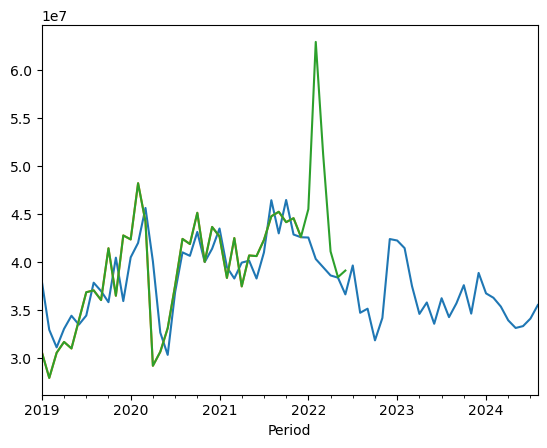

In [86]:
preds.plot()
df_uah2["T1"].plot()
df_uah1["T1"].plot()

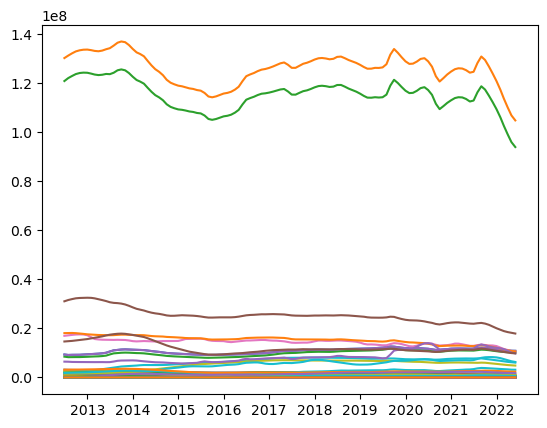

In [50]:
def plotting_decomposition(df, trend, seasonal, residual):
  fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
  fig.set_figheight(20)
  fig.set_figwidth(20)

  axes[0].plot(df.index,df, label='Original series')
  axes[0].legend(loc='upper left')

  axes[1].plot(df.index,trend, label='Trend')
  axes[1].legend(loc='upper left')

  axes[2].plot(df.index,seasonal, label='Seasonality')
  axes[2].legend(loc='upper left')

  axes[3].plot(df.index,residual, label='Residuals')
  axes[3].legend(loc='upper left')

for col in df_uah1.columns:
    additive_decomposition = seasonal_decompose(x=df_uah1[col], model="additive", period=12)
    residual = additive_decomposition.resid
    seasonal = additive_decomposition.seasonal
    trend = additive_decomposition.trend
    plt.plot(trend)
    
#     plotting_decomposition(df_uah1[col], trend, seasonal, residual)
